In [1]:
from collections import Counter
import os
from glob import glob
import re
import numbers

from graphviz import Source
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
import networkx as nx
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter



sns.set_style('white')
sns.set_context('notebook')

def plot_style(figsize=(12, 6), labelsize=20, titlesize=24, ticklabelsize=14, **kwargs):
   basic_style = {
       'figure.figsize': figsize,
       'axes.labelsize': labelsize,
       'axes.titlesize': titlesize,
       'xtick.labelsize': ticklabelsize,
       'ytick.labelsize': ticklabelsize,
       'axes.spines.top': False,
       'axes.spines.right': False,
       'axes.spines.left': False,
       'axes.grid': False,
       'axes.grid.axis': 'y',
   }
   basic_style.update(kwargs)
   return plt.rc_context(rc=basic_style)

blue = sns.xkcd_rgb['ocean blue']

In [3]:
# Read scored obtained from Pedro
#scores = pd.read_csv('../../data/YFV2001_learn_error_rate/YFV2001_scores_cv.csv')

scores = pd.read_csv('/Users/johard/Documents/mcmt/for_pedro/testing_cv_script/val_scores.csv')
scores = scores.drop('Unnamed: 0', axis=1)

In [4]:
scores = scores.sort_index(axis=1)
scores

,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,...,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23
0,-0.000132,-0.000201,-0.000269,-0.000311,-0.00037,-0.000381,-0.000403,-0.000403,-0.000403,-0.000415,...,-0.000415,-0.000428,-0.000428,-0.000429,-0.000572,-0.000859,-0.001529,-0.002294,-0.003425,-0.003436
1,-0.000132,-0.000201,-0.000269,-0.000311,-0.00037,-0.000381,-0.000403,-0.000403,-0.000403,-0.000415,...,-0.000415,-0.000428,-0.000428,-0.000429,-0.000572,-0.000859,-0.001529,-0.002294,-0.003425,-0.003436
2,-0.000132,-0.000201,-0.000269,-0.000311,-0.00037,-0.000381,-0.000403,-0.000403,-0.000403,-0.000415,...,-0.000415,-0.000428,-0.000428,-0.000429,-0.000572,-0.000859,-0.001529,-0.002294,-0.003425,-0.003436


In [72]:
scores = scores.sort_index(axis=1)
scores

,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23
0,-0.210388,-0.215295,-0.218969,-0.196029,-0.194110,-0.189203,-0.205008,-0.188633,-0.201103,-0.216114,-0.193239,-0.192653,-0.192076,-0.191931,-0.195924,-0.197782,-0.193137,-0.179360,-0.174658,-0.160537,-0.140840,-0.125285,-0.123936
1,-0.203904,-0.218205,-0.227365,-0.194318,-0.186583,-0.184077,-0.183739,-0.185060,-0.184080,-0.191297,-0.189808,-0.194971,-0.204274,-0.198484,-0.200613,-0.201337,-0.203421,-0.201530,-0.210689,-0.220081,-0.172517,-0.199629,-0.192096
2,-0.235268,-0.199088,-0.177865,-0.163921,-0.180195,-0.180085,-0.192729,-0.196710,-0.196002,-0.201248,-0.199910,-0.197536,-0.199561,-0.194261,-0.198204,-0.197402,-0.196904,-0.209646,-0.210964,-0.192695,-0.199809,-0.266951,-0.306914


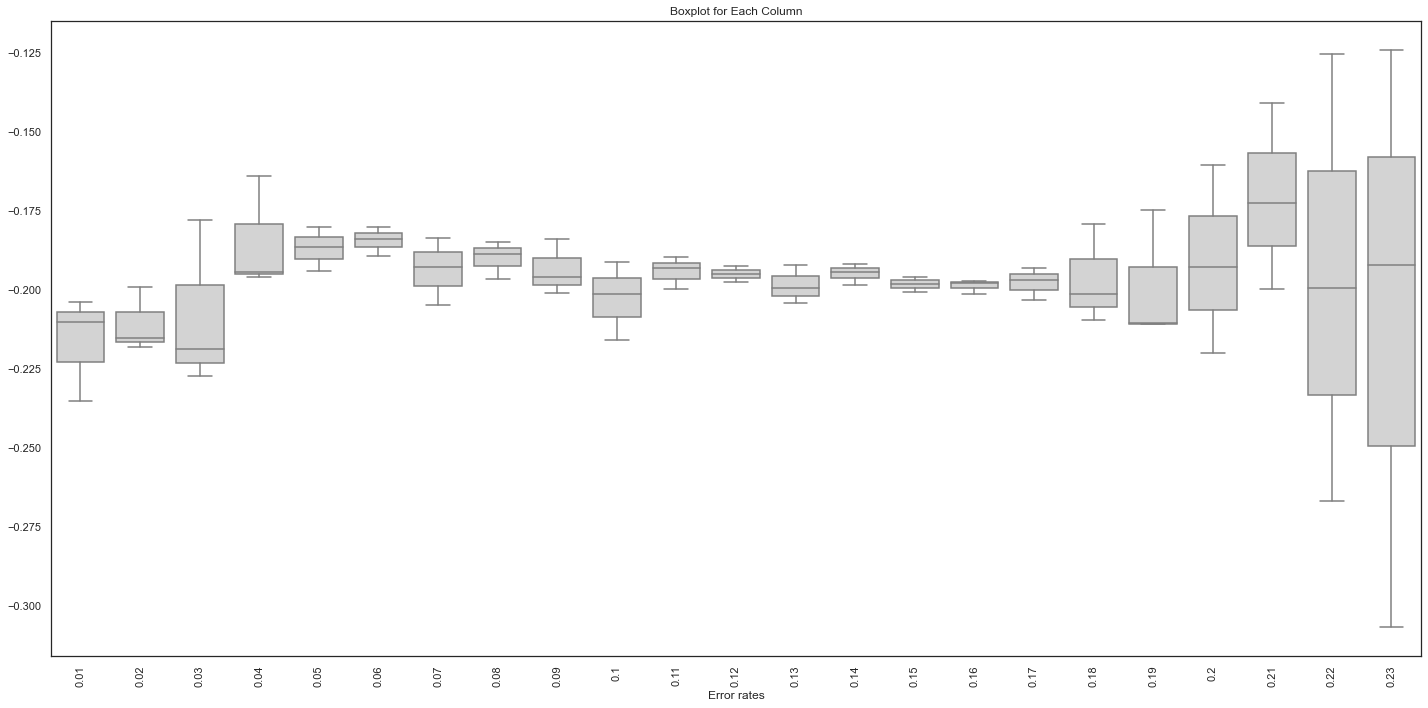

In [73]:
# Create a boxplot
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
sns.boxplot(data=scores, orient='vertical', color='Lightgrey')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Error rates')
plt.ylabel('')
plt.title('Boxplot for Each Column')
plt.tight_layout()

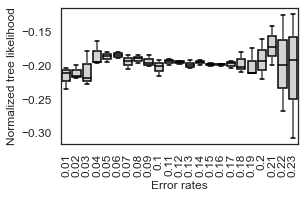

In [82]:
plt.figure(figsize=(4.4, 2.9))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.boxplot(data=scores, orient='vertical', boxprops={'edgecolor': 'black', 'facecolor': 'lightgrey'}, medianprops={'color': 'black'}, capprops={'color': 'black'})

plt.xticks(rotation=90)
plt.xlabel('Error rates')
plt.ylabel('Normalized tree likelihood')

plt.tight_layout()


plt.savefig(f'../../data/YFV2001_figures/learn_error_rate.svg', dpi=300, bbox_inches='tight', transparent=True)

plt.show()


In [65]:
# For each error rate, compute variance, mean, median and mean over variance

pd.set_option('display.max_columns', None)

variance_row = scores.iloc[0:3, :].var(axis=0)
mean_row = scores.iloc[0:3, :].mean(axis=0)
median_row = scores.iloc[0:3, :].median(axis=0)

# Calculate median/variance
median_over_variance_row = median_row / variance_row

# Calculate mean/variance
mean_over_variance_row = mean_row / variance_row

# Create new rows and add them to the DataFrame
scores.loc['variance'] = variance_row
scores.loc['mean'] = mean_row
scores.loc['median'] = median_row
scores.loc['median/variance'] = median_over_variance_row
scores.loc['mean/variance'] = mean_over_variance_row

scores

,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23
0,-0.210388,-0.215295,-0.218969,-0.196029,-0.194110,-0.189203,-0.205008,-0.188633,-0.201103,-0.216114,-0.193239,-0.192653,-0.192076,-0.191931,-0.195924,-0.197782,-0.193137,-0.179360,-0.174658,-0.160537,-0.140840,-0.125285,-0.123936
1,-0.203904,-0.218205,-0.227365,-0.194318,-0.186583,-0.184077,-0.183739,-0.185060,-0.184080,-0.191297,-0.189808,-0.194971,-0.204274,-0.198484,-0.200613,-0.201337,-0.203421,-0.201530,-0.210689,-0.220081,-0.172517,-0.199629,-0.192096
2,-0.235268,-0.199088,-0.177865,-0.163921,-0.180195,-0.180085,-0.192729,-0.196710,-0.196002,-0.201248,-0.199910,-0.197536,-0.199561,-0.194261,-0.198204,-0.197402,-0.196904,-0.209646,-0.210964,-0.192695,-0.199809,-0.266951,-0.306914
variance,0.000274,0.000106,0.000702,0.000326,0.000049,0.000021,0.000114,0.000036,0.000076,0.000156,0.000026,0.000006,0.000038,0.000011,0.000005,0.000005,0.000027,0.000246,0.000436,0.000888,0.000871,0.005021,0.008552
mean,-0.216520,-0.210863,-0.208066,-0.184756,-0.186963,-0.184455,-0.193826,-0.190134,-0.193728,-0.202886,-0.194319,-0.195053,-0.198637,-0.194892,-0.198247,-0.198840,-0.197821,-0.196845,-0.198770,-0.191104,-0.171055,-0.197288,-0.207649
median,-0.210388,-0.215295,-0.218969,-0.194318,-0.186583,-0.184077,-0.192729,-0.188633,-0.196002,-0.201248,-0.193239,-0.194971,-0.199561,-0.194261,-0.198204,-0.197782,-0.196904,-0.201530,-0.210689,-0.192695,-0.172517,-0.199629,-0.192096
median/variance,-767.488337,-2029.211934,-312.044809,-595.506950,-3845.583962,-8811.298531,-1690.615875,-5295.407029,-2568.075704,-1290.124781,-7323.644951,-32686.299488,-5273.703966,-17604.041404,-36043.757151,-41989.764268,-7274.065264,-819.991061,-483.145990,-216.930816,-198.085901,-39.755263,-22.463180
mean/variance,-789.859199,-1987.433591,-296.508235,-566.202568,-3853.411852,-8829.393036,-1700.231653,-5337.553904,-2538.286854,-1300.628278,-7364.560790,-32700.061908,-5249.279794,-17661.220043,-36051.547715,-42214.357946,-7307.938002,-800.930969,-455.814141,-215.140539,-196.407251,-39.289098,-24.281888


## best median, lowest variance

In [66]:
# Select the error rates with the best median

# Get the median values
median_values = scores.loc['median']

# Sort the columns by median values in descending order
sorted_columns = median_values.sort_values(ascending=False)

# Calculate the number of columns to select (30% of total columns)
percent_to_select = 0.3
num_columns_to_select = int(len(scores.columns) * percent_to_select)

# Select the top 30% of columns
selected_columns = sorted_columns[:num_columns_to_select]

# Create a new DataFrame with only the selected columns
best_median = scores[selected_columns.index]

# To display the new DataFrame
best_median

,0.21,0.06,0.05,0.08,0.23,0.2
0,-0.140840,-0.189203,-0.194110,-0.188633,-0.123936,-0.160537
1,-0.172517,-0.184077,-0.186583,-0.185060,-0.192096,-0.220081
2,-0.199809,-0.180085,-0.180195,-0.196710,-0.306914,-0.192695
variance,0.000871,0.000021,0.000049,0.000036,0.008552,0.000888
mean,-0.171055,-0.184455,-0.186963,-0.190134,-0.207649,-0.191104
median,-0.172517,-0.184077,-0.186583,-0.188633,-0.192096,-0.192695
median/variance,-198.085901,-8811.298531,-3845.583962,-5295.407029,-22.463180,-216.930816
mean/variance,-196.407251,-8829.393036,-3853.411852,-5337.553904,-24.281888,-215.140539


In [67]:
# Select the column with the lowest variance

# Get the variance values
variance_values = best_median.loc['variance']

# Find the column with the smallest variance
column_with_smallest_variance = variance_values.idxmin()

print("The error rate is:", column_with_smallest_variance)

The error rate is: 0.06


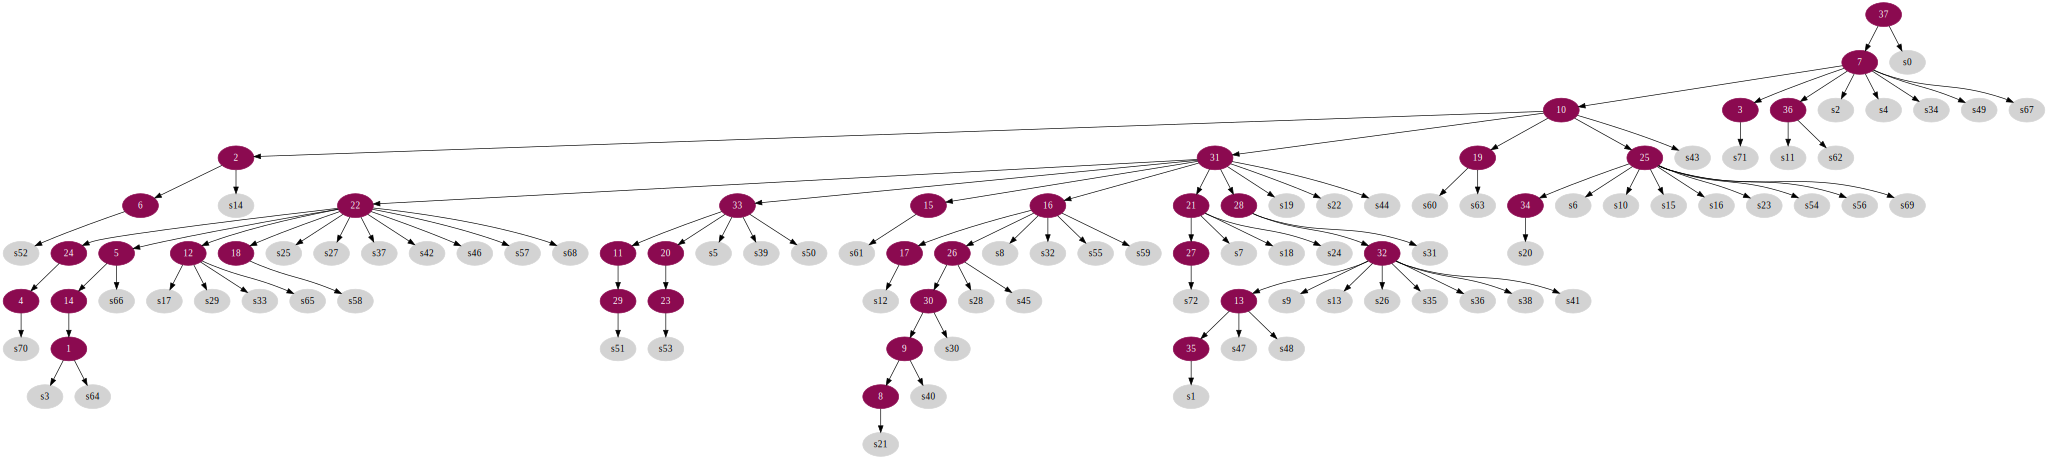

In [68]:
Source.from_file(f'../../../mt-SCITE/mt-SCITE_output/YFV2001/0.06_1_map0.gv')